# Milestone 1

## EDA on 120 Years of olympic  data :

- A case study of olympic data from Athens 1896 to Rio 2016 (120 years).
- This dataset is taken from kaggle. To access the dataset visit 'https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results?select=athlete_ events.csv'.
- We'll clean this data to fill the missing values and to handle outliers, then we'll analyse the data to discover various insights using different methods of data visualization.

## Cleaning data

### Importing needed libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from matplotlib import pyplot as plt
%matplotlib inline

def get_path(dataset_name,env_name='colab'):
    prefix = 'https://raw.githubusercontent.com/John-Ghaly88/Data_Engineering_And_Visualization_Course/main/Datasets/Project/'
    if env_name == 'colab':
        return prefix+dataset_name
    else:
        return f'../Datasets/{dataset_name}'

### Reading and exploring the csv file

In [2]:
events = pd.read_csv(get_path('athlete_events.csv'))

events.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [3]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [4]:
events.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


### Searching for null values

In [5]:
events.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

### Filling the missing values

In [6]:
events['Medal'].fillna('No Medal', inplace =True)
#Because null values in the medal attribute may indicate that this athlete wasn't awarded a medal

In [7]:
events['Age'].fillna(round(events.Age.mean()), inplace=True)
events['Height'].fillna(round(events.Height.mean()), inplace=True)
events['Weight'].fillna(round(events.Weight.mean()), inplace=True)
#Because Age, Height & Weight are missing values probably MAR, so we need to replace the missing values by plausible values
#by computing the mean for each attributes (Univariate Imputation)

### Checking the dataset after filling the missing values

In [8]:
events.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No Medal
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No Medal
2,3,Gunnar Nielsen Aaby,M,24.0,175.0,71.0,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,No Medal
3,4,Edgar Lindenau Aabye,M,34.0,175.0,71.0,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,No Medal


In [9]:
events.isnull().sum()

ID        0
Name      0
Sex       0
Age       0
Height    0
Weight    0
Team      0
NOC       0
Games     0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
dtype: int64

In [10]:
events.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,271116.000000,271116.00000,271116.000000,271116.000000
mean,68248.954396,25.572382,175.26374,70.771411,1978.378480
std,39022.286345,6.281384,9.27917,12.575317,29.877632
min,1.000000,10.000000,127.00000,25.000000,1896.000000
25%,34643.000000,22.000000,170.00000,63.000000,1960.000000
50%,68205.000000,25.000000,175.00000,71.000000,1988.000000
75%,102097.250000,28.000000,180.00000,75.000000,2002.000000
max,135571.000000,97.000000,226.00000,214.000000,2016.000000


## Data Visualization

### Pie Chart to visualize the distribution of males versus females

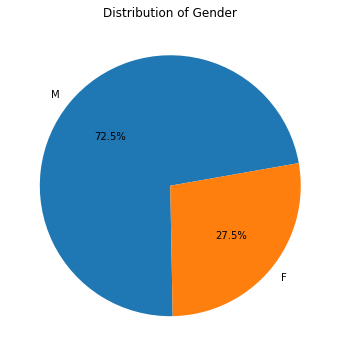

In [11]:
gender_counts = events.Sex.value_counts()
plt.figure(figsize=(12,6))
plt.title('Distribution of Gender')
plt.pie(gender_counts,labels=gender_counts.index,autopct='%1.1f%%',startangle=10);

### Histogram to visualize the distribution of age

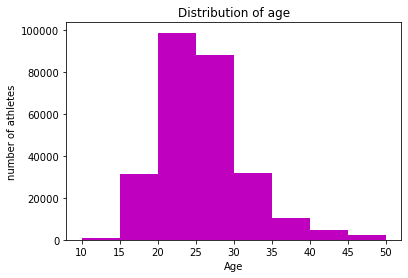

In [12]:
plt.title('Distribution of age')
plt.ylabel('number of athletes')
plt.xlabel('Age')
plt.hist(events.Age, bins= np.arange(10,55,5),color='m');

Ages from 10 to 15 and from 40 to 50 are considered as outliers but we don't care to handle them because they are actual data that may be needed in our analysis.

### Barchart to visualize top 10 countries with different medals obtained

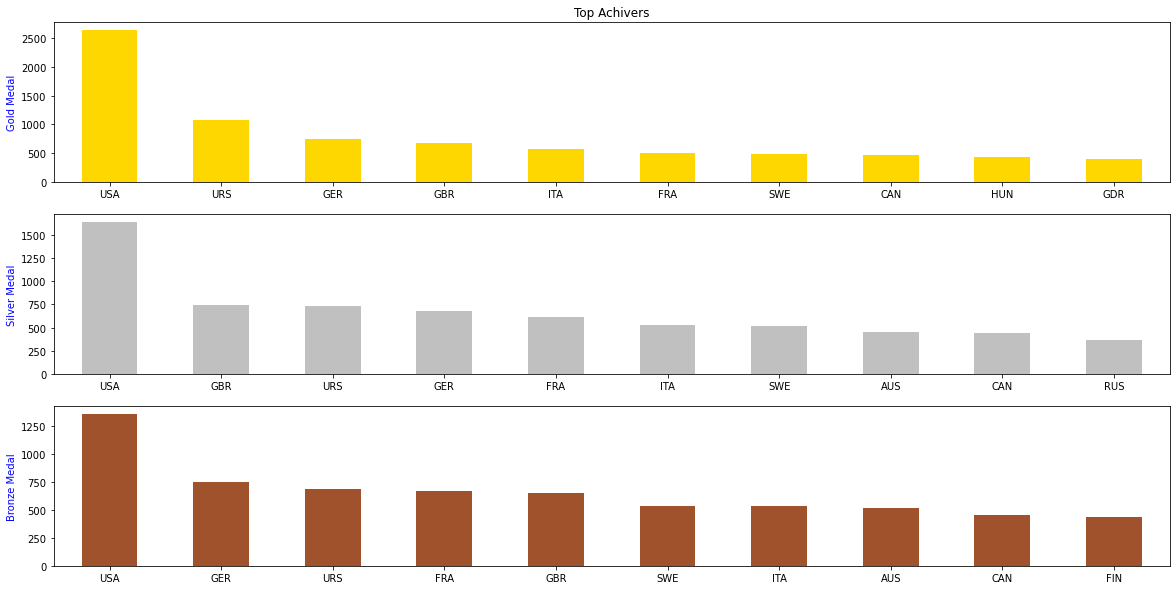

In [13]:
plt.subplot(3,1,1)
plt.title('Top Achivers')
gold = events[events.Medal == "Gold"].NOC.value_counts().head(10)
gold.plot(kind='bar',rot=0,figsize=(20, 10),color='gold')
plt.ylabel("Gold Medal",color='b')

plt.subplot(3,1,2)
silver = events[events.Medal == "Silver"].NOC.value_counts().head(10)
silver.plot(kind='bar',rot=0,figsize=(20, 10),color='silver')
plt.ylabel("Silver Medal",color='b')

plt.subplot(3,1,3)
bronze = events[events.Medal == "Bronze"].NOC.value_counts().head(10)
bronze.plot(kind='bar',rot=0,figsize=(20, 10),color='sienna')
plt.ylabel("Bronze Medal",color='b')
plt.show()

### Scatter plot to visualize participation of males versus females in olympics over time

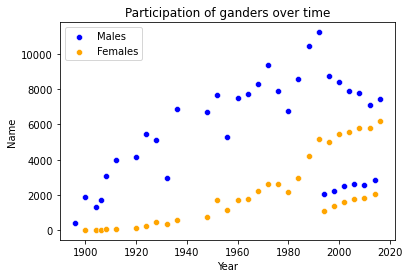

In [14]:
female_year = events[events.Sex=='F'].groupby('Year').agg('count').Name
male_year = events[events.Sex=='M'].groupby('Year').agg('count').Name
plt.title('Participation of ganders over time')
(sns.scatterplot(data= male_year,color='blue'),
sns.scatterplot(data =female_year,color='orange'));
plt.legend(labels=["Males","Females"])

 ### Barchart to visualize number of men winners in olympics over time

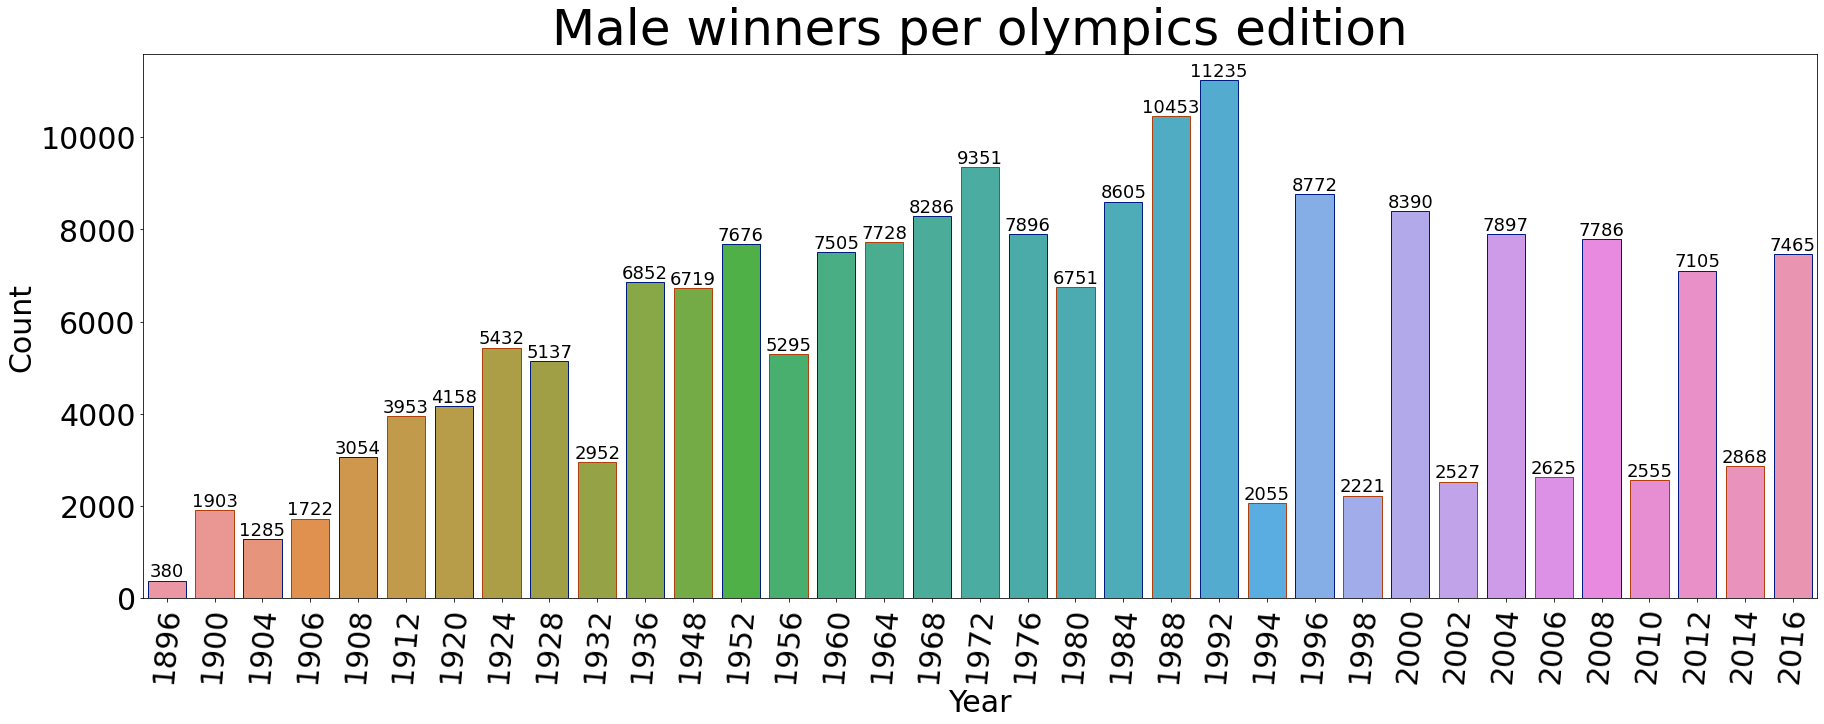

In [15]:
plt.figure(figsize=(30,10))
plt.xticks(rotation=85, size=30)
plt.yticks(size=30)
ax = sns.countplot(x='Year', data= events[(events.Sex == 'M')], edgecolor=sns.color_palette("dark", 2))
plt.title('Male winners per olympics edition',fontsize=50);
ax.set_xlabel("Year",fontsize=30)
ax.set_ylabel("Count",fontsize=30)


for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=18, color='black', ha='center', va='bottom')

 ### Barchart to visualize number of women winners in olympics over time

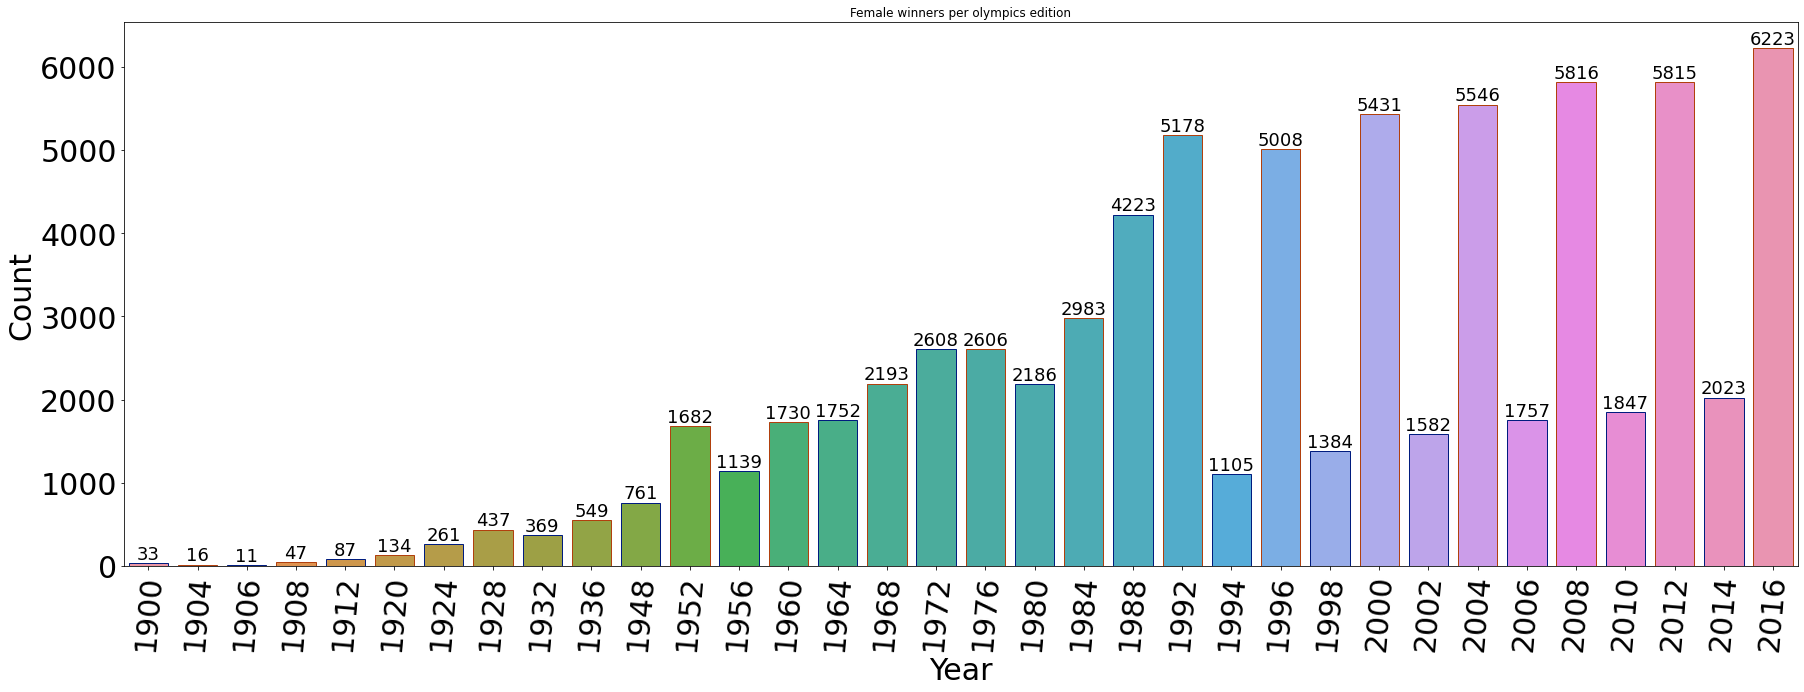

In [16]:
plt.figure(figsize=(30,10))
plt.xticks(rotation=85, size=30)
plt.yticks(size=30)
ax = sns.countplot(x='Year', data= events[(events.Sex == 'F')], edgecolor=sns.color_palette("dark", 2))
plt.title('Female winners per olympics edition');
ax.set_xlabel("Year",fontsize=30)
ax.set_ylabel("Count",fontsize=30)

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=18, color='black', ha='center', va='bottom')

# Milestone 2

## Data Integration

### Reading noc_regions.csv file

In [17]:
df_noc_regions = pd.read_csv(get_path('noc_regions.csv'))

df_noc_regions['notes'].fillna('No Notes', inplace =True)

df_noc_regions.head()

,NOC,region,notes
0,AFG,Afghanistan,No Notes
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,No Notes
3,ALG,Algeria,No Notes
4,AND,Andorra,No Notes


### Integrating noc_region.csv with athelete_events.csv 

In [18]:
events = df_noc_regions.merge(events, how='inner', on=['NOC'])
events.head()

,NOC,region,notes,ID,Name,Sex,Age,Height,Weight,Team,Games,Year,Season,City,Sport,Event,Medal
0,AFG,Afghanistan,No Notes,502,Ahmad Shah Abouwi,M,26.0,175.0,71.0,Afghanistan,1956 Summer,1956,Summer,Melbourne,Hockey,Hockey Men's Hockey,No Medal
1,AFG,Afghanistan,No Notes,1076,Jammal-ud-Din Affendi,M,28.0,175.0,71.0,Afghanistan,1936 Summer,1936,Summer,Berlin,Hockey,Hockey Men's Hockey,No Medal
2,AFG,Afghanistan,No Notes,1101,Mohammad Anwar Afzal,M,26.0,175.0,71.0,Afghanistan,1948 Summer,1948,Summer,London,Football,Football Men's Football,No Medal
3,AFG,Afghanistan,No Notes,1745,Mohammad Aktar,M,17.0,156.0,48.0,Afghanistan,1980 Summer,1980,Summer,Moskva,Wrestling,"Wrestling Men's Light-Flyweight, Freestyle",No Medal
4,AFG,Afghanistan,No Notes,4628,Mohammad Daoud Anwary,M,22.0,175.0,71.0,Afghanistan,1964 Summer,1964,Summer,Tokyo,Wrestling,"Wrestling Men's Bantamweight, Freestyle",No Medal


### Reading Medals.xlsx file (the dataset contains data about only 2021(2020) Tokyo Olympics)

In [19]:
df_Medals = pd.read_excel(get_path('Medals.xlsx'))
df_Medals.head()

,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
2,3,Japan,27,14,17,58,5
3,4,Great Britain,22,21,22,65,4
4,5,ROC,20,28,23,71,3


### Updating some records in Medals.xlsx for consistent data before merging

In [20]:
df_Medals["Team/NOC"].replace({"United States of America": "USA", "People's Republic of China":"China", "Great Britain":"UK", "ROC":"Russia", "Republic of Korea": "North Korea",
"Islamic Republic of Iran":"Iran", "Chinese Taipei":"Taiwan", "Hong Kong, China":"China", "North Macedonia": "Macedonia", "Côte d'Ivoire":"Ivory Coast", "Republic of Moldova":"Moldova"
,"Syrian Arab Republic":"Syria"},inplace = True)

df_Medals.head()

,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,USA,39,41,33,113,1
1,2,China,38,32,18,88,2
2,3,Japan,27,14,17,58,5
3,4,UK,22,21,22,65,4
4,5,Russia,20,28,23,71,3


### Integrating Medals.xlsx with the new athelete_events.csv

In [21]:
df_events_Medals = events.merge(df_Medals, how='inner', left_on = "region", right_on = "Team/NOC")

df_events_Medals.head()

,NOC,region,notes,ID,Name,Sex,Age,Height,Weight,Team,...,Sport,Event,Medal,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,ANZ,Australia,Australasia,1537,William Victor Aitken,M,19.0,175.0,71.0,Australasia,...,Athletics,Athletics Men's Marathon,No Medal,6,Australia,17,7,22,46,6
1,ANZ,Australia,Australasia,7037,"Reginald Leslie ""Snowy"" Baker",M,24.0,178.0,71.0,Australasia,...,Diving,Diving Men's Springboard,No Medal,6,Australia,17,7,22,46,6
2,ANZ,Australia,Australasia,7037,"Reginald Leslie ""Snowy"" Baker",M,24.0,178.0,71.0,Australasia,...,Boxing,Boxing Men's Middleweight,Silver,6,Australia,17,7,22,46,6
3,ANZ,Australia,Australasia,7037,"Reginald Leslie ""Snowy"" Baker",M,24.0,178.0,71.0,Australasia,...,Swimming,Swimming Men's 4 x 200 metres Freestyle Relay,No Medal,6,Australia,17,7,22,46,6
4,ANZ,Australia,Australasia,7980,John Thomas Barnett,M,28.0,175.0,71.0,Australasia,...,Rugby,Rugby Men's Rugby,Gold,6,Australia,17,7,22,46,6


### New dataset including for each Team/NOC: the amount of gold, silver, bronze and total medals they won for each year that Team/NOC participated, as asked by the project description

### Nevertheless it does not make sense because it will add the same values for all the years per region because as mentioned above the new dataset contains only data about 1 year (2020 tokyo)

In [22]:
events_Medals_grouped = df_events_Medals.groupby(['Team/NOC','Year','Gold','Silver','Bronze','Total'])

Medals_per_year_per_NOC = pd.DataFrame(events_Medals_grouped.size().reset_index(name = 'Groupping'))
Medals_per_year_per_NOC.drop('Groupping', axis = 1,inplace = True)

#Medals_per_year_per_NOC[(Medals_per_year_per_NOC['Team/NOC']=='USA')]
Medals_per_year_per_NOC

,Team/NOC,Year,Gold,Silver,Bronze,Total
0,Argentina,1900,0,1,2,3
1,Argentina,1908,0,1,2,3
2,Argentina,1920,0,1,2,3
3,Argentina,1924,0,1,2,3
4,Argentina,1928,0,1,2,3
...,...,...,...,...,...,...
1951,Venezuela,2006,1,3,0,4
1952,Venezuela,2008,1,3,0,4
1953,Venezuela,2012,1,3,0,4
1954,Venezuela,2014,1,3,0,4


## Feature Engineering

### Adding a new feature calculating the BMI for each athlete

In [23]:
events['BMI'] = ((events['Weight'])/(events['Height']**2)) * 10000

events.head()

,NOC,region,notes,ID,Name,Sex,Age,Height,Weight,Team,Games,Year,Season,City,Sport,Event,Medal,BMI
0,AFG,Afghanistan,No Notes,502,Ahmad Shah Abouwi,M,26.0,175.0,71.0,Afghanistan,1956 Summer,1956,Summer,Melbourne,Hockey,Hockey Men's Hockey,No Medal,23.183673
1,AFG,Afghanistan,No Notes,1076,Jammal-ud-Din Affendi,M,28.0,175.0,71.0,Afghanistan,1936 Summer,1936,Summer,Berlin,Hockey,Hockey Men's Hockey,No Medal,23.183673
2,AFG,Afghanistan,No Notes,1101,Mohammad Anwar Afzal,M,26.0,175.0,71.0,Afghanistan,1948 Summer,1948,Summer,London,Football,Football Men's Football,No Medal,23.183673
3,AFG,Afghanistan,No Notes,1745,Mohammad Aktar,M,17.0,156.0,48.0,Afghanistan,1980 Summer,1980,Summer,Moskva,Wrestling,"Wrestling Men's Light-Flyweight, Freestyle",No Medal,19.723866
4,AFG,Afghanistan,No Notes,4628,Mohammad Daoud Anwary,M,22.0,175.0,71.0,Afghanistan,1964 Summer,1964,Summer,Tokyo,Wrestling,"Wrestling Men's Bantamweight, Freestyle",No Medal,23.183673


### Adding a new feature inicating the weight status for each athlete based on his/her calculated BMI

In [24]:
events.loc[events['BMI'] < 18.5, 'Weight_Status'] = 'Underweight'
events.loc[((events['BMI'] >= 18.5) & (events['BMI'] < 25)), 'Weight_Status'] = 'Healthy'
events.loc[((events['BMI'] >= 25) & (events['BMI'] < 30)), 'Weight_Status'] = 'Overweight'
events.loc[events['BMI'] >= 30, 'Weight_Status'] = 'Obese'

events.head()

,NOC,region,notes,ID,Name,Sex,Age,Height,Weight,Team,Games,Year,Season,City,Sport,Event,Medal,BMI,Weight_Status
0,AFG,Afghanistan,No Notes,502,Ahmad Shah Abouwi,M,26.0,175.0,71.0,Afghanistan,1956 Summer,1956,Summer,Melbourne,Hockey,Hockey Men's Hockey,No Medal,23.183673,Healthy
1,AFG,Afghanistan,No Notes,1076,Jammal-ud-Din Affendi,M,28.0,175.0,71.0,Afghanistan,1936 Summer,1936,Summer,Berlin,Hockey,Hockey Men's Hockey,No Medal,23.183673,Healthy
2,AFG,Afghanistan,No Notes,1101,Mohammad Anwar Afzal,M,26.0,175.0,71.0,Afghanistan,1948 Summer,1948,Summer,London,Football,Football Men's Football,No Medal,23.183673,Healthy
3,AFG,Afghanistan,No Notes,1745,Mohammad Aktar,M,17.0,156.0,48.0,Afghanistan,1980 Summer,1980,Summer,Moskva,Wrestling,"Wrestling Men's Light-Flyweight, Freestyle",No Medal,19.723866,Healthy
4,AFG,Afghanistan,No Notes,4628,Mohammad Daoud Anwary,M,22.0,175.0,71.0,Afghanistan,1964 Summer,1964,Summer,Tokyo,Wrestling,"Wrestling Men's Bantamweight, Freestyle",No Medal,23.183673,Healthy


### Discretizing the age feature to discrete age ranges

In [25]:
events.loc[events['Age'] < 15, 'Age_Group'] = 'Child'
events.loc[((events['Age'] >= 15) & (events['Age'] < 25)), 'Age_Group'] = 'Youth'
events.loc[((events['Age'] >= 25) & (events['Age'] < 65)), 'Age_Group'] = 'Adult'
events.loc[events['Age'] >= 65, 'Age_Group'] = 'Senior'

del events['Age']

events.head()

,NOC,region,notes,ID,Name,Sex,Height,Weight,Team,Games,Year,Season,City,Sport,Event,Medal,BMI,Weight_Status,Age_Group
0,AFG,Afghanistan,No Notes,502,Ahmad Shah Abouwi,M,175.0,71.0,Afghanistan,1956 Summer,1956,Summer,Melbourne,Hockey,Hockey Men's Hockey,No Medal,23.183673,Healthy,Adult
1,AFG,Afghanistan,No Notes,1076,Jammal-ud-Din Affendi,M,175.0,71.0,Afghanistan,1936 Summer,1936,Summer,Berlin,Hockey,Hockey Men's Hockey,No Medal,23.183673,Healthy,Adult
2,AFG,Afghanistan,No Notes,1101,Mohammad Anwar Afzal,M,175.0,71.0,Afghanistan,1948 Summer,1948,Summer,London,Football,Football Men's Football,No Medal,23.183673,Healthy,Adult
3,AFG,Afghanistan,No Notes,1745,Mohammad Aktar,M,156.0,48.0,Afghanistan,1980 Summer,1980,Summer,Moskva,Wrestling,"Wrestling Men's Light-Flyweight, Freestyle",No Medal,19.723866,Healthy,Youth
4,AFG,Afghanistan,No Notes,4628,Mohammad Daoud Anwary,M,175.0,71.0,Afghanistan,1964 Summer,1964,Summer,Tokyo,Wrestling,"Wrestling Men's Bantamweight, Freestyle",No Medal,23.183673,Healthy,Youth


### Deleting the notes feature, because it's considered an unuseful feature as it doesn't give any important information for the data modeling.

In [26]:
del events['notes']

## Handling outliers

### Handling outliers for the Height and Weight

#### Scatter plot for my dataset before handling the outliers

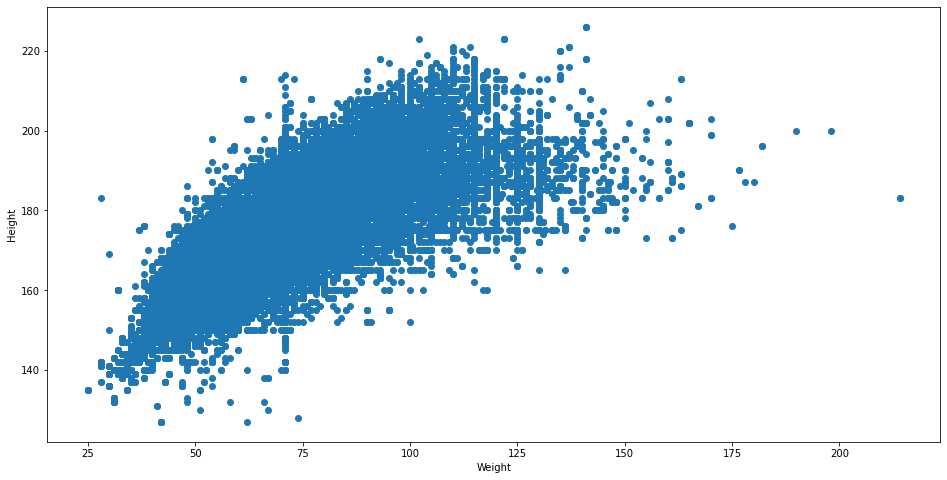

In [27]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(events['Weight'], events['Height'])
ax.set_xlabel('Weight')
ax.set_ylabel('Height')
plt.show()

#### Handling the Height outliers

In [28]:
z = np.abs(stats.zscore(events['Height']))

clear_height_events = events[z < 3]

print(events.shape)
print(clear_height_events.shape)

(270767, 18)
(268730, 18)


#### Handling the Weight outliers

In [29]:
z = np.abs(stats.zscore(clear_height_events['Weight']))

clear_weight_events = clear_height_events[z < 3]

print(clear_height_events.shape)
print(clear_weight_events.shape)

events = clear_weight_events

(268730, 18)
(265899, 18)


#### Scatter plot for my dataset after handling the outliers

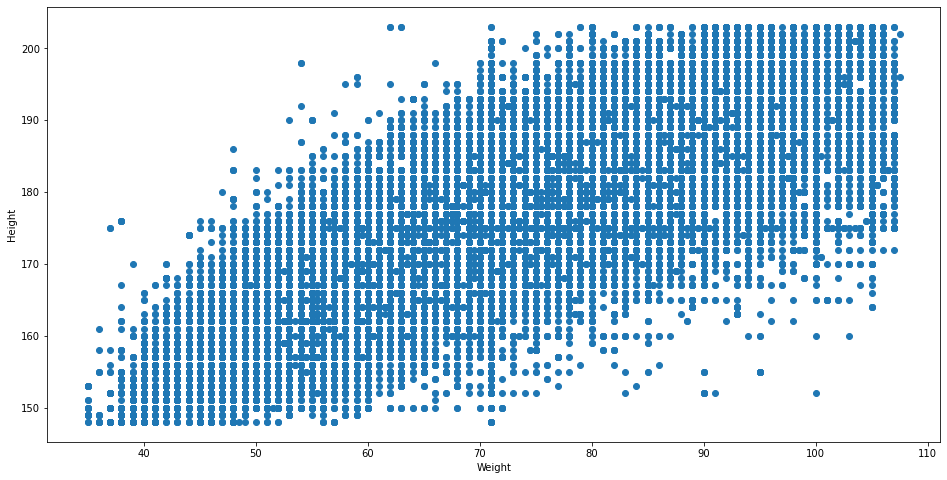

In [30]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(clear_weight_events['Weight'], clear_weight_events['Height'])
ax.set_xlabel('Weight')
ax.set_ylabel('Height')
plt.show()

### Handling outliers for the Age Groups

#### Plotting a bar plot to show the count for each age group (detecting that children and seniors are outliers)

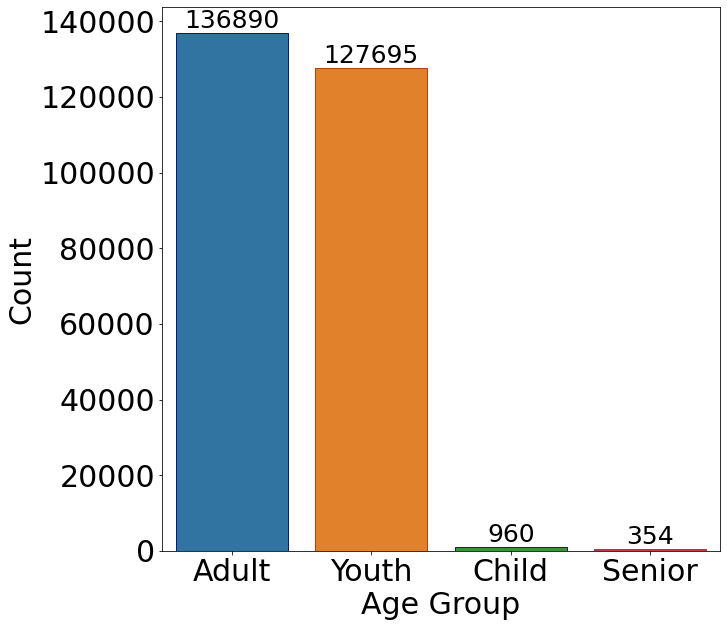

In [31]:
plt.figure(figsize=(10,10))
plt.xticks(size=30)
plt.yticks(size=30)
ax = sns.countplot(x='Age_Group', data= events, edgecolor=sns.color_palette("dark", 2))
ax.set_xlabel("Age Group",fontsize=30)
ax.set_ylabel("Count",fontsize=30)

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=25, color='black', ha='center', va='bottom')

#### Removing the records containing the outliers of the Age Group

In [32]:
clear_Age_events = events[events.Age_Group != 'Senior']
clear_Age_events = clear_Age_events[clear_Age_events.Age_Group != 'Child']
print(events.shape)
print(clear_Age_events.shape)

events = clear_Age_events

(265899, 18)
(264585, 18)


### Handling outliers for the NOC

#### Detecting what NOCs are outliers

In [33]:
x = dict(events.NOC.value_counts())

x

{'USA': 18307,
 'FRA': 12587,
 'GBR': 12030,
 'ITA': 10505,
 'GER': 9627,
 'CAN': 9530,
 'JPN': 8267,
 'SWE': 8240,
 'AUS': 7413,
 'HUN': 6419,
 'SUI': 6099,
 'POL': 6085,
 'NED': 5728,
 'URS': 5544,
 'FIN': 5406,
 'ESP': 5138,
 'AUT': 5075,
 'RUS': 4972,
 'NOR': 4933,
 'CHN': 4911,
 'KOR': 4396,
 'TCH': 4301,
 'ROU': 4246,
 'BEL': 3804,
 'BRA': 3723,
 'DEN': 3535,
 'BUL': 3433,
 'ARG': 3233,
 'FRG': 3230,
 'GRE': 3089,
 'MEX': 2797,
 'GDR': 2581,
 'YUG': 2528,
 'UKR': 2465,
 'CUB': 2414,
 'NZL': 2293,
 'CZE': 1841,
 'BLR': 1726,
 'RSA': 1691,
 'EGY': 1575,
 'POR': 1518,
 'KAZ': 1407,
 'IND': 1378,
 'TUR': 1312,
 'IRL': 1308,
 'SLO': 1094,
 'TPE': 1068,
 'COL': 1045,
 'SVK': 1036,
 'LUX': 991,
 'LAT': 923,
 'CHI': 914,
 'PUR': 892,
 'VEN': 891,
 'NGR': 849,
 'EST': 840,
 'EUN': 839,
 'JAM': 836,
 'CRO': 806,
 'KEN': 770,
 'IRI': 749,
 'PRK': 740,
 'THA': 731,
 'PHI': 685,
 'MAR': 677,
 'HKG': 672,
 'ISR': 661,
 'ISL': 600,
 'LTU': 585,
 'URU': 562,
 'PAK': 561,
 'TUN': 541,
 'ALG': 540

#### Removing the NOCs that barely appeared in the olympics

In [34]:
clear_NOC_events = events.groupby('NOC').filter(lambda x : len(x)>50)

print(events.shape)
print(clear_NOC_events.shape)

events = clear_Age_events

(264585, 18)
(263348, 18)


## Analysis

### What is the BMI Distribution of gold medalists volleyball players compared to basketball players? 

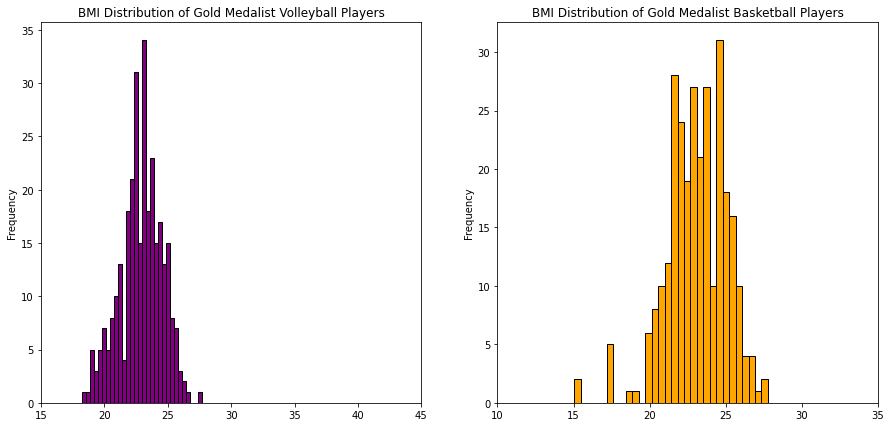

In [35]:
events.loc[:,['Weight', 'Height', 'BMI']]

Volleyball=events[(events["Medal"]=='Gold') & (events["Sport"]=='Volleyball')].loc[:,["BMI","Sport","Medal"]]    
Basketball=events[(events["Medal"]=='Gold') & (events["Sport"]=='Basketball')].loc[:,["BMI","Sport","Medal"]]    

f,ax=plt.subplots(1,2,figsize=(15,7))

Volleyball.BMI.plot.hist(ax=ax[0],bins=30,edgecolor='black',color='purple')

ax[0].set_title('BMI Distribution of Gold Medalist Volleyball Players')
x1=list(range(15,50,5))
ax[0].set_xticks(x1)

Basketball.BMI.plot.hist(ax=ax[1],bins=30,edgecolor='black',color='orange')

ax[1].set_title('BMI Distribution of Gold Medalist Basketball Players')
x2=list(range(10,40,5))
ax[1].set_xticks(x2)

### What is the distribution of olympic athletes according to their weight status?

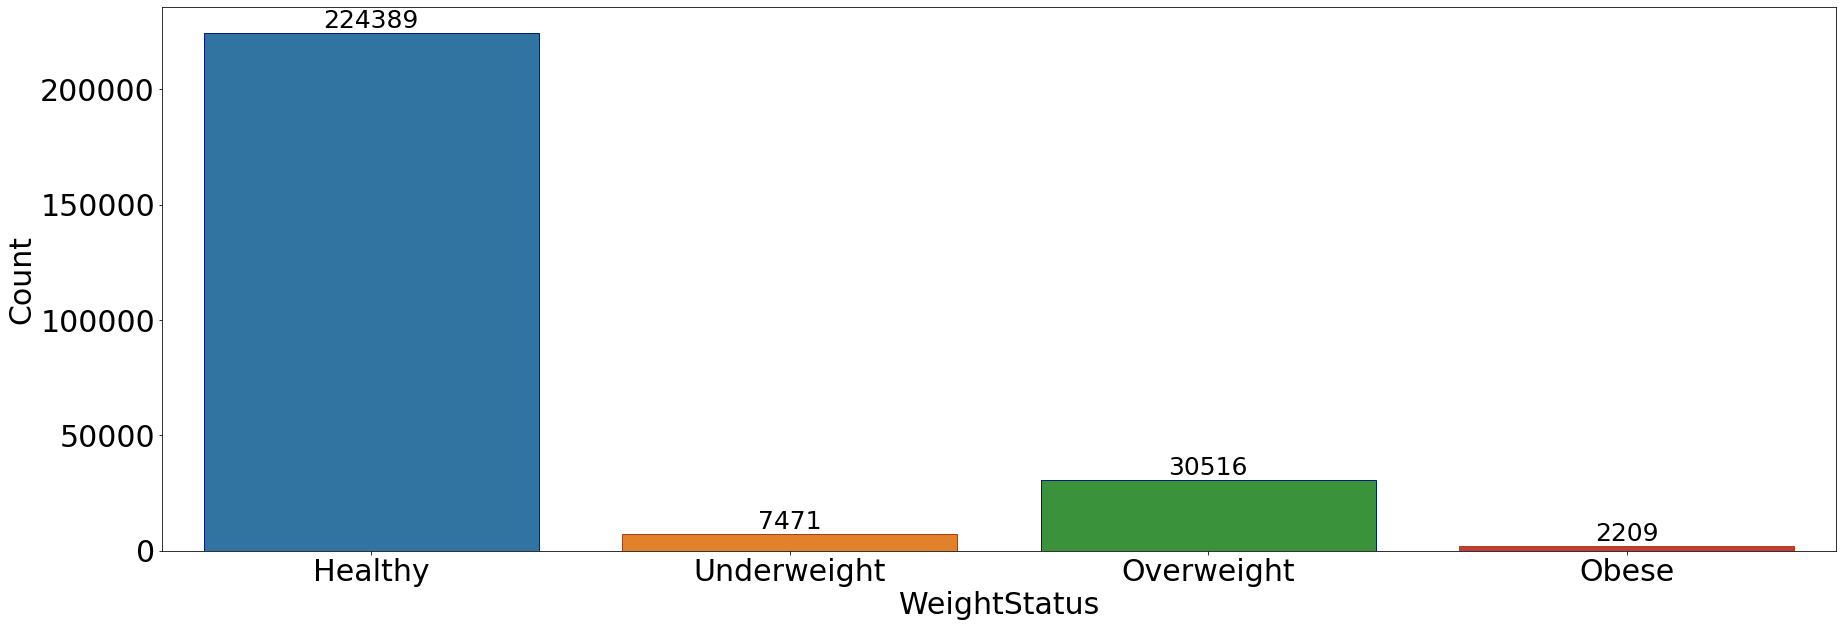

In [36]:
plt.figure(figsize=(30,10))
plt.xticks(size=30)
plt.yticks(size=30)
ax = sns.countplot(x='Weight_Status', data= events, edgecolor=sns.color_palette("dark", 2))
ax.set_xlabel("WeightStatus",fontsize=30)
ax.set_ylabel("Count",fontsize=30)

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=25, color='black', ha='center', va='bottom')

### Barchart to visualize top 10 countries with different medals obtained

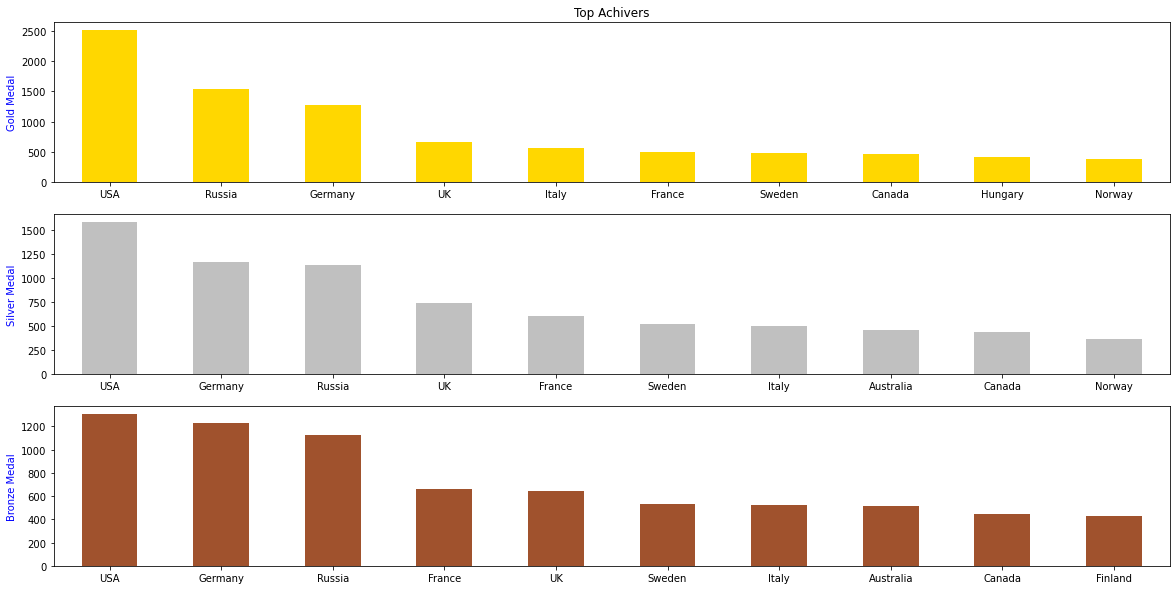

In [37]:
plt.subplot(3,1,1)
plt.title('Top Achivers')
gold = events[events.Medal == "Gold"].region.value_counts().head(10)
gold.plot(kind='bar',rot=0,figsize=(20, 10),color='gold')
plt.ylabel("Gold Medal",color='b')

plt.subplot(3,1,2)
silver = events[events.Medal == "Silver"].region.value_counts().head(10)
silver.plot(kind='bar',rot=0,figsize=(20, 10),color='silver')
plt.ylabel("Silver Medal",color='b')

plt.subplot(3,1,3)
bronze = events[events.Medal == "Bronze"].region.value_counts().head(10)
bronze.plot(kind='bar',rot=0,figsize=(20, 10),color='sienna')
plt.ylabel("Bronze Medal",color='b')
plt.show()